# Dangit, Dave! 
## Last talk of the day, and you're between us and happy hour!

Have patience...  we're gonna find some beer.
This is a little demo to show Python running inside Jupyter, and do some simple mapping using the ArcGIS Python API.
I will use the Yelp API and we'll authenticate using `rauth`, construct the query, parse the JSON and display the results.

Shell script to set up environment (if needed)

In [1]:
%%sh
# pip install rauth --user
jupyter nbextension enable --py widgetsnbextension 

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


Info on the Yelp API here: https://www.yelp.com/developers/documentation/v2/overview
![Yelp](https://s3-media2.fl.yelpcdn.com/assets/srv0/styleguide/1ea40efd80f5/assets/img/brand_guidelines/yelp_fullcolor.png "Yelp")

In [2]:
# goodies for doing authentication
import rauth

In [3]:
# A function to build the set of parameters

def get_search_parameters(lat,long,searchterm):
  #See the Yelp API for more details
    params = {}
    params["term"] = searchterm
    params["ll"] = "{},{}".format(str(lat),str(long))
    params["radius_filter"] = "1500"
    params["limit"] = "40"
    params["sort"] = 1
 
    return params

# A function to create the session via OAuth and query the API

def get_results(params):
 
  #Obtain these from Yelp's manage access page
    consumer_key = "<your_consumer_key>"
    consumer_secret = "<your_consumer_secret>"
    token = "<your_token>"
    token_secret = "<your_token_secret>"
   
    session = rauth.OAuth1Session(consumer_key = consumer_key,consumer_secret = consumer_secret,access_token = token,access_token_secret = token_secret)
     
    request = session.get("http://api.yelp.com/v2/search",params=params)
   
    #Transforms the JSON API response into a Python dictionary
    data = request.json()
    session.close()
   
    return data

# Now let's set some stuff up to query - using Potomac Yards location as search centroid.
params=get_search_parameters(38.8485698,-77.0529716,'bars')

# call the query function
resultset=get_results(params)

# show me the JSON!
import json
#this will let me see the json prettyprinted.
print(json.dumps(resultset, indent=4))

{
    "total": 40,
    "region": {
        "span": {
            "latitude_delta": 0.025399025083302718,
            "longitude_delta": 0.019729526720652757
        },
        "center": {
            "latitude": 38.8490832885985,
            "longitude": -77.0525134333088
        }
    },
    "businesses": [
        {
            "rating": 3.5,
            "mobile_url": "https://m.yelp.com/biz/clark-street-grill-arlington?adjust_creative=RLYXySWp8Hey01ipPG05Hg&utm_campaign=yelp_api&utm_medium=api_v2_search&utm_source=RLYXySWp8Hey01ipPG05Hg",
            "image_url": "https://s3-media4.fl.yelpcdn.com/bphoto/-OUeHjp5X456YY34hyUduw/ms.jpg",
            "snippet_image_url": "https://s3-media1.fl.yelpcdn.com/photo/d22fAi-HpOvNS7oDJEONdg/ms.jpg",
            "is_claimed": true,
            "display_phone": "+1-703-418-1577",
            "rating_img_url": "https://s3-media1.fl.yelpcdn.com/assets/2/www/img/5ef3eb3cb162/ico/stars/v1/stars_3_half.png",
            "categories": [
               

Let's poke around a little in the JSON results

In [4]:
print(resultset['businesses'][0]['name'])
print(resultset['businesses'][0]['location']['coordinate'])

print(resultset['businesses'][0]['rating'])
print(resultset['businesses'][0]['rating_img_url'])
print(resultset['businesses'][0]['location'])
print(resultset['businesses'][0]['location']['city'])
print(resultset['businesses'][0]['location']['state_code'])
print(resultset['businesses'][0]['url'])
print(resultset['businesses'][0]['rating_img_url'])


Clark Street Grill
{'latitude': 38.8487329326326, 'longitude': -77.0521889351277}
3.5
https://s3-media1.fl.yelpcdn.com/assets/2/www/img/5ef3eb3cb162/ico/stars/v1/stars_3_half.png
{'state_code': 'VA', 'coordinate': {'latitude': 38.8487329326326, 'longitude': -77.0521889351277}, 'city': 'Arlington', 'display_address': ['2711 Jefferson Davis Hwy', 'Crystal City', 'Arlington, VA 22202'], 'geo_accuracy': 9.5, 'country_code': 'US', 'postal_code': '22202', 'address': ['2711 Jefferson Davis Hwy'], 'neighborhoods': ['Crystal City']}
Arlington
VA
https://www.yelp.com/biz/clark-street-grill-arlington?adjust_creative=RLYXySWp8Hey01ipPG05Hg&utm_campaign=yelp_api&utm_medium=api_v2_search&utm_source=RLYXySWp8Hey01ipPG05Hg
https://s3-media1.fl.yelpcdn.com/assets/2/www/img/5ef3eb3cb162/ico/stars/v1/stars_3_half.png


In [5]:
print(resultset['region'])
centerlat=resultset['region']['center']['latitude']
centerlon=resultset['region']['center']['longitude']


{'span': {'latitude_delta': 0.025399025083302718, 'longitude_delta': 0.019729526720652757}, 'center': {'latitude': 38.8490832885985, 'longitude': -77.0525134333088}}


In [6]:
print(len(resultset['businesses']))

40


### I don't wanna dig through JSON to find beer.  Show me the MAP!

In [7]:
from arcgis.gis import GIS
from arcgis.geometry import Point

In [8]:
gis = GIS()

In [9]:
map1 = gis.map()
map1.basemap = "streets-night-vector"
map1.height='600px'

In [10]:
map1

Widget Javascript not detected.  It may not be installed or enabled properly.


In [11]:
map1.center = [centerlat,centerlon]
map1.zoom = 15

found a nice little beer mug icon here: http://iconbug.com/data/56/64/e02a0d6de95812dae4f3c301f23917c4.png

In [12]:
map1.clear_graphics()

epaptsymb={
  "type" : "esriPMS", 
  "url" : "https://www3.epa.gov/epafiles/images/logo_epaseal-aara.gif", 
  "contentType" : "image/gif", 
  "width" : 34, 
  "height" : 34, 
  "angle" : 0, 
  "xoffset" : 0, 
  "yoffset" : 0
}

poicoord={'x':-77.050784,'y':38.848509}
poipnt=Point(poicoord)
poipuptext={'title':'EPA Potomac Yard','content':'2777 Crystal Dr<br/>Arlington, VA'}
map1.draw(poipnt,popup=poipuptext,symbol=epaptsymb)

In [13]:
ptsymb={
  "type" : "esriPMS", 
  "url" : "http://iconbug.com/data/56/64/e02a0d6de95812dae4f3c301f23917c4.png", 
  "contentType" : "image/png", 
  "width" : 22, 
  "height" : 22, 
  "angle" : 0, 
  "xoffset" : 0, 
  "yoffset" : 0
}

for i in range(len(resultset['businesses'])):
    poicoord={'x':resultset['businesses'][i]['location']['coordinate']['longitude'],
              'y':resultset['businesses'][i]['location']['coordinate']['latitude']}
    poipupcontent=('<b>'+str(resultset['businesses'][i]['name'])+'</b><br/>'
                   +str(resultset['businesses'][i]['location']['address'][0])
                   +'<br/>'
                   +str(resultset['businesses'][i]['location']['city'])
                   +' '
                   +str(resultset['businesses'][i]['location']['state_code'])
                   +'<br/>'
                   +'<a href="'
                   +resultset['businesses'][i]['url']
                   +'" target="_blank"</a>'
                   +'<img src="'
                   +(resultset['businesses'][i]['rating_img_url'])
                   +'"></a>'
                  )
    poipnt=Point(poicoord)
    poipuptext={'title':'Nearby Bar from Yelp','content':str(poipupcontent)}
    map1.draw(poipnt,popup=poipuptext,symbol=ptsymb)

In [14]:
import pandas as pd

In [15]:
df=pd.DataFrame(columns=('name','latitude','longitude','rating'))

In [16]:
for i in range(len(resultset['businesses'])):
    df.loc[i] = [resultset['businesses'][i]['name'],resultset['businesses'][i]['location']['coordinate']['latitude'],resultset['businesses'][i]['location']['coordinate']['longitude'],resultset['businesses'][i]['rating']]

In [17]:
from IPython.display import display, HTML

In [18]:
print('Pandas Dataframe')
display(df)

Pandas Dataframe


,name,latitude,longitude,rating
0,Clark Street Grill,38.848733,-77.052189,3.5
1,Lobbibar,38.848984,-77.051956,3.0
2,Fresh Kitchen,38.849464,-77.053291,2.0
3,O'Malley's Pub - Arlington,38.849460,-77.053290,3.0
4,Cinnabar,38.848698,-77.051643,3.0
5,Samuel Adams Brewhouse,38.850137,-77.052057,3.0
6,Page,38.849983,-77.052058,2.5
7,SOCCi,38.847119,-77.050971,3.5
8,KBQ Korean BBQ & Bar,38.852330,-77.050210,3.0
9,Shisha Palace,38.852692,-77.053032,3.0


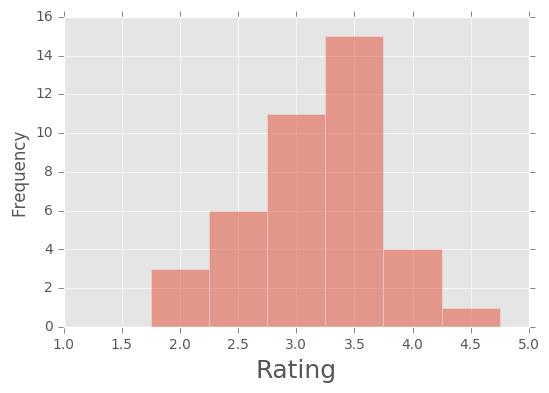

In [19]:
import matplotlib.pyplot as plt


%matplotlib inline

plt.style.use('ggplot')
plt.figure();
plt.xlabel('Rating', fontsize=18)

df.rating.plot.hist(alpha=0.5,bins=[1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75])

In [20]:
beersites = gis.content.import_data(df)

In [21]:
from arcgis.features.analyze_patterns import interpolate_points

In [22]:
import getpass
password = getpass.getpass("Enter password: ")
gis = GIS("https://<yourOrg>.maps.arcgis.com","<YourUserName>", password)
print("Successfully logged in as: " + gis.properties.user.username)

Enter password: ········
Successfully logged in as: DruidSmith


Use Empirical Bayesian Kriging to do an interpolated beer ratings surface

In [23]:
interpolated_beer = interpolate_points(beersites, field='rating', interpolate_option='1', num_classes=5, class_breaks=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])

In [24]:
intmap = gis.map(location=(38.848509,-77.050784),zoomlevel=15)
intmap

Widget Javascript not detected.  It may not be installed or enabled properly.


In [25]:
intmap.add_layer(interpolated_beer['result_layer'])
print(interpolated_beer)

{'predicted_point_layer': <FeatureCollection>, 'prediction_error': <FeatureCollection>, 'result_layer': <FeatureCollection>}


In [27]:
epaptsymb={
  "type" : "esriPMS", 
  "url" : "https://www3.epa.gov/epafiles/images/logo_epaseal-aara.gif", 
  "contentType" : "image/gif", 
  "width" : 34, 
  "height" : 34, 
  "angle" : 0, 
  "xoffset" : 0, 
  "yoffset" : 0
}

poicoord={'x':-77.050784,'y':38.848509}
poipnt=Point(poicoord)
poipuptext={'title':'EPA Potomac Yard','content':'2777 Crystal Dr<br/>Arlington, VA'}
intmap.draw(poipnt,popup=poipuptext,symbol=epaptsymb)


ptsymb={
  "type" : "esriPMS", 
  "url" : "http://iconbug.com/data/56/64/e02a0d6de95812dae4f3c301f23917c4.png", 
  "contentType" : "image/png", 
  "width" : 22, 
  "height" : 22, 
  "angle" : 0, 
  "xoffset" : 0, 
  "yoffset" : 0
}

for i in range(len(resultset['businesses'])):
    poicoord={'x':resultset['businesses'][i]['location']['coordinate']['longitude'],
              'y':resultset['businesses'][i]['location']['coordinate']['latitude']}
    poipupcontent=('<b>'+str(resultset['businesses'][i]['name'])+'</b><br/>'
                   +str(resultset['businesses'][i]['location']['address'][0])
                   +'<br/>'
                   +str(resultset['businesses'][i]['location']['city'])
                   +' '
                   +str(resultset['businesses'][i]['location']['state_code'])
                   +'<br/>'
                   +'<a href="'
                   +resultset['businesses'][i]['url']
                   +'" target="_blank"</a>'
                   +'<img src="'
                   +(resultset['businesses'][i]['rating_img_url'])
                   +'"></a>'
                  )
    poipnt=Point(poicoord)
    poipuptext={'title':'Nearby Bar from Yelp','content':str(poipupcontent)}
    intmap.draw(poipnt,popup=poipuptext,symbol=ptsymb)